# Analyse exploratoire de la demande hôtelière
## City Hotel vs Resort Hotel

**Projet :** 8PRO408 - Outils de programmation pour la science des données  
**Dataset :** Hotel Booking Demand (119,390 réservations, 32 variables)

---

Ce notebook présente une analyse exploratoire complète des données de réservations hôtelières, avec une comparaison entre les City Hotels et Resort Hotels.


In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(" Bibliothèques importées avec succès")


 Bibliothèques importées avec succès


## 1. Exploration du dataset

Cette section présente :
- Aperçu des colonnes et types de données
- Détection des valeurs manquantes
- Identification des doublons
- Nettoyage minimal des données


In [2]:
# Chargement des données
df = pd.read_csv('data/hotel_bookings.csv')
print(f" Données chargées : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\n Aperçu des 5 premières lignes :")
df.head()

 Données chargées : 119390 lignes × 32 colonnes

 Aperçu des 5 premières lignes :


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Informations sur les colonnes et types de données
print(" Informations sur les colonnes :")
print(f"\nNombre total de colonnes : {len(df.columns)}")
print(f"\nTypes de données :")
print(df.dtypes.value_counts())
print("\n" + "="*60)
print("\nListe complète des colonnes :")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col:30s} ({df[col].dtype})")


 Informations sur les colonnes :

Nombre total de colonnes : 32

Types de données :
int64      16
object     12
float64     4
Name: count, dtype: int64


Liste complète des colonnes :
 1. hotel                          (object)
 2. is_canceled                    (int64)
 3. lead_time                      (int64)
 4. arrival_date_year              (int64)
 5. arrival_date_month             (object)
 6. arrival_date_week_number       (int64)
 7. arrival_date_day_of_month      (int64)
 8. stays_in_weekend_nights        (int64)
 9. stays_in_week_nights           (int64)
10. adults                         (int64)
11. children                       (float64)
12. babies                         (int64)
13. meal                           (object)
14. country                        (object)
15. market_segment                 (object)
16. distribution_channel           (object)
17. is_repeated_guest              (int64)
18. previous_cancellations         (int64)
19. previous_bookings_not_canceled

In [5]:
# Statistiques descriptives
print(" Statistiques descriptives des variables numériques :")
df.describe()

 Statistiques descriptives des variables numériques :


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
# Détection des valeurs manquantes
print(" Analyse des valeurs manquantes :")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({
'Colonne': missing.index,
'Valeurs manquantes': missing.values,
'Pourcentage (%)': missing_pct.values
})
missing_df = missing_df[missing_df['Valeurs manquantes'] > 0].sort_values('Valeurs manquantes', ascending=False)

if len(missing_df) > 0:
    print(f"\n{len(missing_df)} colonnes avec des valeurs manquantes :")
    print(missing_df.to_string(index=False))
else:
    print("\n Aucune valeur manquante détectée !")


 Analyse des valeurs manquantes :

4 colonnes avec des valeurs manquantes :
 Colonne  Valeurs manquantes  Pourcentage (%)
 company              112593            94.31
   agent               16340            13.69
 country                 488             0.41
children                   4             0.00


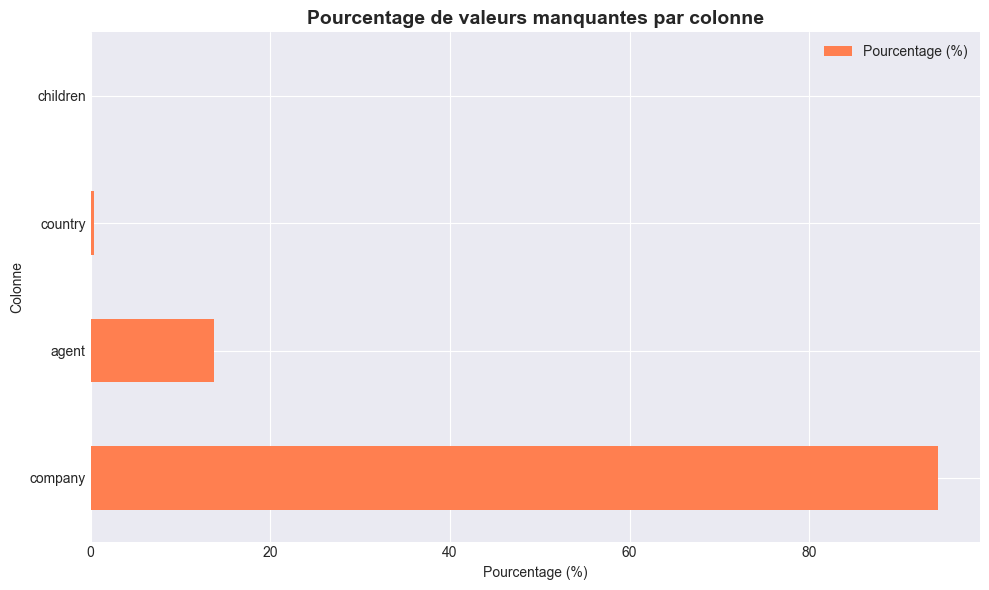

In [12]:
# Visualisation des valeurs manquantes
if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(10, 6))
    missing_df.plot(x='Colonne', y='Pourcentage (%)', kind='barh', ax=ax, color='coral')
    ax.set_title('Pourcentage de valeurs manquantes par colonne', fontsize=14, fontweight='bold')
    ax.set_xlabel('Pourcentage (%)')
    plt.tight_layout()
    plt.show()

In [ ]:
# Détection des doublons
print(" Détection des doublons :")
duplicates = df.duplicated().sum()
print(f"Nombre de lignes dupliquées : {duplicates} ({duplicates/len(df)*100:.2f}%)")

if duplicates > 0:
    print("\n Aperçu des lignes dupliquées :")
    df[df.duplicated(keep=False)].head(10)

In [ ]:
# Nettoyage des données
print(" Nettoyage des données en cours...")

# Copie du dataframe
df_clean = df.copy()

# Suppression des doublons
initial_rows = len(df_clean)
df_clean = df_clean.drop_duplicates()
print(f" {initial_rows - len(df_clean)} doublons supprimés")

# Gestion des valeurs manquantes
df_clean['children'] = df_clean['children'].fillna(0)
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean['agent'] = df_clean['agent'].fillna(0).astype(int)
df_clean['company'] = df_clean['company'].fillna(0).astype(int)

# Conversion des dates
df_clean['reservation_status_date'] = pd.to_datetime(df_clean['reservation_status_date'])

# Conversion des colonnes catégorielles
categorical_cols = ['hotel', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type',
                    'assigned_room_type', 'deposit_type', 'customer_type',
                    'reservation_status']

for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

# Calcul de nouvelles variables
df_clean['total_stay'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']
df_clean['total_people'] = df_clean['adults'] + df_clean['children'] + df_clean['babies']
df_clean['total_revenue'] = df_clean['adr'] * df_clean['total_stay']

# Suppression des valeurs aberrantes
before_outliers = len(df_clean)
df_clean = df_clean[df_clean['adr'] >= 0]
df_clean = df_clean[df_clean['adr'] < 10000]
df_clean = df_clean[df_clean['total_people'] > 0]
df_clean = df_clean[df_clean['total_stay'] > 0]
print(f" {before_outliers - len(df_clean)} lignes avec valeurs aberrantes supprimées")

print(f"\n Nettoyage terminé : {len(df_clean)} lignes restantes (sur {len(df)} initiales)")


## 2. Comparaison City Hotel vs Resort Hotel

Comparaison des deux types d'hôtels sur :
- Taux d'annulation
- Prix moyen (ADR)
- Durée des séjours (weekend/weeknights)
- Répartition des types de clients


In [ ]:
# Répartition des réservations par type d'hôtel
print(" Répartition des réservations :")
hotel_counts = df_clean['hotel'].value_counts()
hotel_pct = df_clean['hotel'].value_counts(normalize=True) * 100

for hotel, count in hotel_counts.items():
print(f" {hotel}: {count:,} réservations ({hotel_pct[hotel]:.1f}%)")

# Visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Graphique en barres
hotel_counts.plot(kind='bar', ax=ax1, color=['#3498db', '#e74c3c'])
ax1.set_title('Nombre de réservations par type d\'hôtel', fontsize=14, fontweight='bold')
ax1.set_xlabel('Type d\'hôtel')
ax1.set_ylabel('Nombre de réservations')
ax1.tick_params(axis='x', rotation=0)

# Graphique en camembert
hotel_counts.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90,
colors=['#3498db', '#e74c3c'])
ax2.set_title('Proportion des réservations', fontsize=14, fontweight='bold')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
# Taux d'annulation par type d'hôtel
print(" Taux d'annulation par type d'hôtel :")
cancellation_by_hotel = df_clean.groupby('hotel')['is_canceled'].agg(['count', 'sum', 'mean'])
cancellation_by_hotel.columns = ['Total', 'Annulées', 'Taux']
cancellation_by_hotel['Taux'] = cancellation_by_hotel['Taux'] * 100
print(cancellation_by_hotel)

# Visualisation Matplotlib/Seaborn
fig, ax = plt.subplots(figsize=(10, 6))
cancellation_by_hotel['Taux'].plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c'])
ax.set_title('Taux d\'annulation par type d\'hôtel', fontsize=16, fontweight='bold')
ax.set_xlabel('Type d\'hôtel', fontsize=12)
ax.set_ylabel('Taux d\'annulation (%)', fontsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
for i, v in enumerate(cancellation_by_hotel['Taux']):
ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Visualisation interactive Plotly - Taux d'annulation
fig = px.bar(
x=cancellation_by_hotel.index,
y=cancellation_by_hotel['Taux'],
color=cancellation_by_hotel.index,
color_discrete_map={'City Hotel': '#3498db', 'Resort Hotel': '#e74c3c'},
labels={'x': 'Type d\'hôtel', 'y': 'Taux d\'annulation (%)'},
title='Taux d\'annulation par type d\'hôtel',
text=cancellation_by_hotel['Taux'].apply(lambda x: f'{x:.1f}%')
)

fig.update_traces(textposition='outside')
fig.update_layout(
showlegend=False,
height=500,
font=dict(size=12)
)
fig.show()

In [ ]:
# Prix moyen (ADR) par type d'hôtel
print(" Prix moyen (ADR) par type d'hôtel :")
adr_by_hotel = df_clean.groupby('hotel')['adr'].agg(['mean', 'median', 'std', 'min', 'max'])
adr_by_hotel.columns = ['Moyenne', 'Médiane', 'Écart-type', 'Minimum', 'Maximum']
print(adr_by_hotel.round(2))

# Boxplot comparatif
fig, ax = plt.subplots(figsize=(10, 6))
df_clean.boxplot(column='adr', by='hotel', ax=ax, patch_artist=True,
boxprops=dict(facecolor='lightblue'),
medianprops=dict(color='red', linewidth=2))
ax.set_title('Distribution des prix (ADR) par type d\'hôtel', fontsize=16, fontweight='bold')
ax.set_xlabel('Type d\'hôtel', fontsize=12)
ax.set_ylabel('Prix moyen journalier (ADR)', fontsize=12)
plt.suptitle('')  # Supprime le titre par défaut
plt.tight_layout()
plt.show()

In [ ]:
# Visualisation interactive Plotly - Boxplot ADR
fig = px.box(
df_clean,
x='hotel',
y='adr',
color='hotel',
color_discrete_map={'City Hotel': '#3498db', 'Resort Hotel': '#e74c3c'},
labels={'hotel': 'Type d\'hôtel', 'adr': 'Prix moyen journalier (ADR)'},
title='Distribution des prix (ADR) par type d\'hôtel'
)
fig.update_layout(
showlegend=False,
height=500,
font=dict(size=12)
)
fig.show()

In [ ]:
# Durée des séjours (weekend vs weeknights) par type d'hôtel
print(" Durée des séjours par type d'hôtel :")
stay_by_hotel = df_clean.groupby('hotel').agg({
'stays_in_weekend_nights': 'mean',
'stays_in_week_nights': 'mean',
'total_stay': 'mean'
}).round(2)
stay_by_hotel.columns = ['Weekend (moy)', 'Semaine (moy)', 'Total (moy)']
print(stay_by_hotel)

# Visualisation
stay_comparison = df_clean.groupby('hotel')[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay']].mean()
stay_comparison.plot(kind='bar', figsize=(12, 6), color=['#f39c12', '#16a085', '#e74c3c'])
plt.title('Durée moyenne des séjours par type d\'hôtel', fontsize=16, fontweight='bold')
plt.xlabel('Type d\'hôtel', fontsize=12)
plt.ylabel('Nombre de nuits (moyenne)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Type de nuit')
plt.tight_layout()
plt.show()

In [ ]:
# Répartition des types de clients par hôtel
print(" Répartition des types de clients :")
customer_type_hotel = pd.crosstab(df_clean['hotel'], df_clean['customer_type'], normalize='index') * 100
print(customer_type_hotel.round(2))

# Visualisation
customer_type_hotel.plot(kind='bar', stacked=True, figsize=(12, 6),
color=['#3498db', '#e74c3c', '#f39c12', '#16a085'])
plt.title('Répartition des types de clients par type d\'hôtel', fontsize=16, fontweight='bold')
plt.xlabel('Type d\'hôtel', fontsize=12)
plt.ylabel('Pourcentage (%)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Type de client', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 3. Analyse temporelle

Analyse des tendances temporelles :
- Saisonnalité (mois, semaines)
- Tendances 2015-2017
- Lead time (délais entre réservation et arrivée)


In [ ]:
# Saisonnalité par mois
df_clean['arrival_date_month_num'] = pd.to_datetime(df_clean['arrival_date_month'], format='%B').dt.month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
'July', 'August', 'September', 'October', 'November', 'December']
month_num_order = [pd.to_datetime(m, format='%B').month for m in month_order]

bookings_by_month = df_clean.groupby('arrival_date_month_num').size()
bookings_by_month_hotel = df_clean.groupby(['arrival_date_month_num', 'hotel']).size().unstack(fill_value=0)

# Visualisation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Graphique 1 : Total par mois
month_names = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun',
'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
bookings_by_month.plot(kind='line', marker='o', ax=ax1, color='#27ae60', linewidth=2, markersize=8)
ax1.set_title('Nombre de réservations par mois (tous hôtels confondus)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Mois', fontsize=12)
ax1.set_ylabel('Nombre de réservations', fontsize=12)
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(month_names)
ax1.grid(True, alpha=0.3)

# Graphique 2 : Comparaison par hôtel
bookings_by_month_hotel.plot(kind='line', marker='o', ax=ax2, linewidth=2, markersize=6)
ax2.set_title('Nombre de réservations par mois - Comparaison City vs Resort', fontsize=14, fontweight='bold')
ax2.set_xlabel('Mois', fontsize=12)
ax2.set_ylabel('Nombre de réservations', fontsize=12)
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(month_names)
ax2.legend(title='Type d\'hôtel')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Visualisation interactive Plotly - Timeline des réservations
df_monthly = df_clean.groupby(['arrival_date_year', 'arrival_date_month_num', 'hotel']).size().reset_index(name='count')
df_monthly['month_year'] = df_monthly['arrival_date_year'].astype(str) + '-' + df_monthly['arrival_date_month_num'].astype(str).str.zfill(2)
df_monthly = df_monthly.sort_values(['arrival_date_year', 'arrival_date_month_num'])

fig = px.line(
df_monthly,
x='month_year',
y='count',
color='hotel',
color_discrete_map={'City Hotel': '#3498db', 'Resort Hotel': '#e74c3c'},
labels={'count': 'Nombre de réservations', 'month_year': 'Mois', 'hotel': 'Type d\'hôtel'},
title='Évolution temporelle des réservations par type d\'hôtel',
markers=True
)

fig.update_layout(
height=500,
xaxis_tickangle=-45,
font=dict(size=12)
)
fig.show()

In [ ]:
# Tendances par année (2015-2017)
print(" Évolution des réservations par année :")
yearly_stats = df_clean.groupby('arrival_date_year').agg({
'is_canceled': ['count', 'sum', 'mean'],
'adr': 'mean',
'total_stay': 'mean'
})

yearly_stats.columns = ['Total réservations', 'Annulations', 'Taux annulation', 'ADR moyen', 'Durée séjour moyenne']
yearly_stats['Taux annulation'] = yearly_stats['Taux annulation'] * 100
print(yearly_stats.round(2))

# Visualisation
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Réservations totales
yearly_stats['Total réservations'].plot(kind='bar', ax=axes[0,0], color='#3498db')
axes[0,0].set_title('Nombre total de réservations par année', fontweight='bold')
axes[0,0].set_xlabel('Année')
axes[0,0].set_ylabel('Nombre de réservations')
axes[0,0].tick_params(axis='x', rotation=0)

# Taux d'annulation
yearly_stats['Taux annulation'].plot(kind='bar', ax=axes[0,1], color='#e74c3c')
axes[0,1].set_title('Taux d\'annulation par année', fontweight='bold')
axes[0,1].set_xlabel('Année')
axes[0,1].set_ylabel('Taux (%)')
axes[0,1].tick_params(axis='x', rotation=0)

# ADR moyen
yearly_stats['ADR moyen'].plot(kind='bar', ax=axes[1,0], color='#f39c12')
axes[1,0].set_title('Prix moyen (ADR) par année', fontweight='bold')
axes[1,0].set_xlabel('Année')
axes[1,0].set_ylabel('ADR moyen')
axes[1,0].tick_params(axis='x', rotation=0)

# Durée moyenne de séjour
yearly_stats['Durée séjour moyenne'].plot(kind='bar', ax=axes[1,1], color='#16a085')
axes[1,1].set_title('Durée moyenne de séjour par année', fontweight='bold')
axes[1,1].set_xlabel('Année')
axes[1,1].set_ylabel('Nuits (moyenne)')
axes[1,1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# Analyse du Lead Time (délai entre réservation et arrivée)
print(" Analyse du Lead Time :")
lead_time_stats = df_clean.groupby('hotel')['lead_time'].agg(['mean', 'median', 'std', 'min', 'max'])
lead_time_stats.columns = ['Moyenne', 'Médiane', 'Écart-type', 'Minimum', 'Maximum']
print(lead_time_stats.round(2))

# Distribution du lead time
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Histogramme
df_clean['lead_time'].hist(bins=50, ax=axes[0], color='skyblue', edgecolor='black')
axes[0].axvline(df_clean['lead_time'].mean(), color='red', linestyle='--', linewidth=2,
label=f'Moyenne: {df_clean["lead_time"].mean():.1f} jours')
axes[0].set_title('Distribution du Lead Time (tous hôtels)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Lead Time (jours)', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].legend()

# Boxplot par hôtel
df_clean.boxplot(column='lead_time', by='hotel', ax=axes[1], patch_artist=True,
boxprops=dict(facecolor='lightblue'),
medianprops=dict(color='red', linewidth=2))
axes[1].set_title('Distribution du Lead Time par type d\'hôtel', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Type d\'hôtel', fontsize=12)
axes[1].set_ylabel('Lead Time (jours)', fontsize=12)
plt.suptitle('')
plt.tight_layout()
plt.show()

In [ ]:
# Visualisation interactive Plotly - Lead Time par hôtel
fig = px.histogram(
df_clean,
x='lead_time',
color='hotel',
nbins=50,
color_discrete_map={'City Hotel': '#3498db', 'Resort Hotel': '#e74c3c'},
labels={'lead_time': 'Lead Time (jours)', 'count': 'Nombre de réservations'},
title='Distribution du Lead Time par type d\'hôtel',
opacity=0.7,
barmode='overlay'
)
fig.update_layout(
height=500,
font=dict(size=12)
)
fig.show()

# Relation entre Lead Time et annulation
print("\n Relation entre Lead Time et annulation :")
lead_time_cancel = df_clean.groupby(['hotel', 'is_canceled'])['lead_time'].mean().unstack()
lead_time_cancel.columns = ['Non annulée', 'Annulée']
print(lead_time_cancel.round(2))

## 4. Analyse des comportements clients

Analyse approfondie des comportements :
- Nombre d'adultes/enfants/bébés
- Demandes spéciales
- Types de dépôts (deposit_type)
- Agents et entreprises


In [ ]:
# Composition des réservations (adultes, enfants, bébés)
print("👨‍👩‍👧‍👦 Composition des réservations :")
composition_stats = df_clean.groupby('hotel').agg({
'adults': 'mean',
'children': 'mean',
'babies': 'mean',
'total_people': 'mean'
}).round(2)
composition_stats.columns = ['Adultes (moy)', 'Enfants (moy)', 'Bébés (moy)', 'Total personnes (moy)']
print(composition_stats)

# Distribution du nombre total de personnes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Histogramme
df_clean['total_people'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='#9b59b6')
axes[0].set_title('Distribution du nombre total de personnes par réservation', fontweight='bold')
axes[0].set_xlabel('Nombre de personnes', fontsize=12)
axes[0].set_ylabel('Nombre de réservations', fontsize=12)

# Comparaison par hôtel
people_by_hotel = pd.crosstab(df_clean['hotel'], df_clean['total_people'], normalize='index') * 100
people_by_hotel.plot(kind='bar', stacked=True, ax=axes[1], colormap='viridis')
axes[1].set_title('Répartition du nombre de personnes par type d\'hôtel', fontweight='bold')
axes[1].set_xlabel('Type d\'hôtel', fontsize=12)
axes[1].set_ylabel('Pourcentage (%)', fontsize=12)
axes[1].legend(title='Nombre de personnes', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# Analyse des demandes spéciales
print(" Analyse des demandes spéciales :")
special_requests_stats = df_clean.groupby('hotel')['total_of_special_requests'].agg(['mean', 'median', 'max'])
special_requests_stats.columns = ['Moyenne', 'Médiane', 'Maximum']
print(special_requests_stats.round(2))

# Distribution des demandes spéciales
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Countplot
sns.countplot(data=df_clean, x='total_of_special_requests', hue='hotel', ax=axes[0])
axes[0].set_title('Distribution du nombre de demandes spéciales', fontweight='bold')
axes[0].set_xlabel('Nombre de demandes spéciales', fontsize=12)
axes[0].set_ylabel('Nombre de réservations', fontsize=12)

# Relation avec les annulations
special_cancel = df_clean.groupby(['total_of_special_requests', 'is_canceled']).size().unstack(fill_value=0)
special_cancel_pct = special_cancel.div(special_cancel.sum(axis=1), axis=0) * 100
special_cancel_pct.plot(kind='bar', stacked=True, ax=axes[1], color=['#2ecc71', '#e74c3c'])
axes[1].set_title('Taux d\'annulation selon le nombre de demandes spéciales', fontweight='bold')
axes[1].set_xlabel('Nombre de demandes spéciales', fontsize=12)
axes[1].set_ylabel('Pourcentage (%)', fontsize=12)
axes[1].legend(['Non annulée', 'Annulée'])
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
# Analyse des types de dépôts
print(" Analyse des types de dépôts :")
deposit_stats = pd.crosstab(df_clean['hotel'], df_clean['deposit_type'], normalize='index') * 100
print(deposit_stats.round(2))

# Relation entre type de dépôt et annulation
deposit_cancel = pd.crosstab([df_clean['hotel'], df_clean['deposit_type']],
df_clean['is_canceled'], normalize='index') * 100
deposit_cancel.columns = ['Non annulée', 'Annulée']
print("\n Taux d'annulation par type de dépôt et hôtel :")
print(deposit_cancel.round(2))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Répartition des dépôts
deposit_stats.plot(kind='bar', ax=axes[0], colormap='Set2')
axes[0].set_title('Répartition des types de dépôts par type d\'hôtel', fontweight='bold')
axes[0].set_xlabel('Type d\'hôtel', fontsize=12)
axes[0].set_ylabel('Pourcentage (%)', fontsize=12)
axes[0].legend(title='Type de dépôt', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].tick_params(axis='x', rotation=0)

# Taux d'annulation par type de dépôt
deposit_cancel_pivot = deposit_cancel.reset_index()
deposit_cancel_pivot = deposit_cancel_pivot[deposit_cancel_pivot['is_canceled'] == 'Annulée']
deposit_cancel_pivot.plot(x='deposit_type', y='Annulée', kind='bar', ax=axes[1],
color=['#3498db', '#e74c3c'])
axes[1].set_title('Taux d\'annulation par type de dépôt', fontweight='bold')
axes[1].set_xlabel('Type de dépôt', fontsize=12)
axes[1].set_ylabel('Taux d\'annulation (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(['City Hotel', 'Resort Hotel'])

plt.tight_layout()
plt.show()

In [ ]:
# Analyse des agents et entreprises (optionnel)
print(" Analyse des agents et entreprises :")
print(f"\nRéservations avec agent : {len(df_clean[df_clean['agent'] > 0])} ({len(df_clean[df_clean['agent'] > 0])/len(df_clean)*100:.1f}%)")
print(f"Réservations avec entreprise : {len(df_clean[df_clean['company'] > 0])} ({len(df_clean[df_clean['company'] > 0])/len(df_clean)*100:.1f}%)")

# Top 10 agents
top_agents = df_clean[df_clean['agent'] > 0]['agent'].value_counts().head(10)
print(f"\n Top 10 agents (nombre de réservations) :")
print(top_agents)

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Réservations avec/sans agent
agent_counts = [
len(df_clean[df_clean['agent'] == 0]),
len(df_clean[df_clean['agent'] > 0])
]
axes[0].pie(agent_counts, labels=['Sans agent', 'Avec agent'], autopct='%1.1f%%',
colors=['#95a5a6', '#3498db'], startangle=90)
axes[0].set_title('Répartition des réservations avec/sans agent', fontweight='bold')

# Réservations avec/sans entreprise
company_counts = [
len(df_clean[df_clean['company'] == 0]),
len(df_clean[df_clean['company'] > 0])
]
axes[1].pie(company_counts, labels=['Sans entreprise', 'Avec entreprise'], autopct='%1.1f%%',
colors=['#95a5a6', '#e74c3c'], startangle=90)
axes[1].set_title('Répartition des réservations avec/sans entreprise', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Visualisations obligatoires

Cette section présente les visualisations demandées :
- Histogrammes / countplots / boxplots (Seaborn/Matplotlib)
- Visualisations interactives (Plotly)
- Graphique comparatif entre les deux hôtels


In [ ]:
# Graphique comparatif complet City vs Resort (OBLIGATOIRE)
fig = make_subplots(
rows=2, cols=2,
subplot_titles=('Taux d\'annulation', 'Prix moyen (ADR)',
'Durée moyenne de séjour', 'Lead Time moyen'),
specs=[[{"type": "bar"}, {"type": "box"}],
[{"type": "bar"}, {"type": "box"}]]
)

# Taux d'annulation
cancel_by_hotel = df_clean.groupby('hotel')['is_canceled'].mean() * 100
fig.add_trace(
go.Bar(x=cancel_by_hotel.index, y=cancel_by_hotel.values,
marker_color=['#3498db', '#e74c3c'], showlegend=False),
row=1, col=1
)

# Prix (ADR)
city_adr = df_clean[df_clean['hotel'] == 'City Hotel']['adr']
resort_adr = df_clean[df_clean['hotel'] == 'Resort Hotel']['adr']
fig.add_trace(go.Box(y=city_adr, name='City Hotel', marker_color='#3498db'), row=1, col=2)
fig.add_trace(go.Box(y=resort_adr, name='Resort Hotel', marker_color='#e74c3c'), row=1, col=2)

# Durée de séjour
stay_by_hotel = df_clean.groupby('hotel')['total_stay'].mean()
fig.add_trace(
go.Bar(x=stay_by_hotel.index, y=stay_by_hotel.values,
marker_color=['#3498db', '#e74c3c'], showlegend=False),
row=2, col=1
)

# Lead Time
city_lead = df_clean[df_clean['hotel'] == 'City Hotel']['lead_time']
resort_lead = df_clean[df_clean['hotel'] == 'Resort Hotel']['lead_time']
fig.add_trace(go.Box(y=city_lead, name='City Hotel', marker_color='#3498db', showlegend=False), row=2, col=2)
fig.add_trace(go.Box(y=resort_lead, name='Resort Hotel', marker_color='#e74c3c', showlegend=False), row=2, col=2)

fig.update_layout(
height=800,
title_text="Comparaison complète City Hotel vs Resort Hotel",
title_x=0.5,
font=dict(size=12)
)

fig.update_xaxes(title_text="Type d'hôtel", row=1, col=1)
fig.update_yaxes(title_text="Taux (%)", row=1, col=1)
fig.update_yaxes(title_text="ADR", row=1, col=2)
fig.update_xaxes(title_text="Type d'hôtel", row=2, col=1)
fig.update_yaxes(title_text="Nuits", row=2, col=1)
fig.update_yaxes(title_text="Jours", row=2, col=2)

fig.show()

In [ ]:
# Heatmap interactive de corrélation (Plotly)
numeric_cols = ['is_canceled', 'lead_time', 'arrival_date_year',
'stays_in_weekend_nights', 'stays_in_week_nights',
'adults', 'children', 'babies', 'adr',
'required_car_parking_spaces', 'total_of_special_requests',
'total_stay', 'total_people']

correlation_df = df_clean[numeric_cols].corr()

fig = px.imshow(
correlation_df,
labels=dict(color="Corrélation"),
color_continuous_scale='RdBu',
aspect="auto",
title="Matrice de corrélation interactive (variables numériques)",
text_auto=True
)

fig.update_layout(height=700, font=dict(size=10))
fig.show()

In [ ]:
# Distribution des prix (histogramme avec Plotly)
fig = px.histogram(
df_clean[df_clean['adr'] < 500],
x='adr',
nbins=50,
color='hotel',
color_discrete_map={'City Hotel': '#3498db', 'Resort Hotel': '#e74c3c'},
labels={'adr': 'Prix moyen journalier (ADR)', 'count': 'Nombre de réservations'},
title='Distribution des prix par type d\'hôtel',
opacity=0.7,
barmode='overlay'
)
fig.update_layout(height=500, font=dict(size=12))
fig.show()

In [ ]:
# Countplot interactif - Types de clients par hôtel
customer_type_counts = pd.crosstab(df_clean['hotel'], df_clean['customer_type'])
fig = px.bar(
customer_type_counts.reset_index(),
x='hotel',
y=customer_type_counts.columns.tolist(),
barmode='group',
color_discrete_sequence=['#3498db', '#e74c3c', '#f39c12', '#16a085'],
labels={'value': 'Nombre de réservations', 'hotel': 'Type d\'hôtel'},
title='Répartition des types de clients par type d\'hôtel'
)
fig.update_layout(height=500, font=dict(size=12))
fig.show()

In [ ]:
# Top 10 pays - Visualisation interactive
top_countries = df_clean['country'].value_counts().head(10)
fig = px.bar(
x=top_countries.values,
y=top_countries.index,
orientation='h',
labels={'x': 'Nombre de réservations', 'y': 'Pays'},
title='Top 10 des pays d\'origine des clients',
color=top_countries.values,
color_continuous_scale='Viridis'
)
fig.update_layout(height=500, font=dict(size=12), showlegend=False)
fig.show()

## 6. Synthèse

### Résultats et tendances clés

#### Annulations
- Le **City Hotel** présente un taux d'annulation plus élevé que le **Resort Hotel**
- Le lead time (délai de réservation) semble influencer positivement le taux d'annulation
- Les types de dépôts ont un impact significatif sur les annulations

#### Prix (ADR)
- Le **Resort Hotel** a généralement un ADR plus élevé que le **City Hotel**
- Il existe une variabilité importante dans les prix, surtout pour le City Hotel

#### Saisonnalité
- Les réservations montrent des pics saisonniers clairs
- Certains mois sont nettement plus chargés que d'autres selon le type d'hôtel

#### Types de clients
- La répartition des types de clients diffère entre les deux types d'hôtels
- Les clients "Transient" dominent dans les deux cas

### Limites des données

1. **Période limitée** : Les données couvrent seulement 2015-2017, ce qui limite l'analyse de tendances long terme
2. **Valeurs manquantes** : Certaines colonnes (country, agent, company) contiennent des valeurs manquantes
3. **Données historiques** : Ce sont des données passées, la situation actuelle peut différer
4. **Contexte géographique** : Le pays d'origine utilise des codes ISO, nécessitant une conversion pour une analyse plus détaillée

### Pistes pour modélisation future

1. **Prédiction des annulations** : Modèle de classification pour prédire les annulations basé sur le lead time, type de dépôt, saison, etc.
2. **Optimisation des prix** : Modèle de régression pour optimiser les prix selon la demande saisonnière
3. **Segmentation des clients** : Clustering pour identifier des profils de clients similaires
4. **Prévision de la demande** : Modèle de série temporelle pour prévoir les réservations futures
5. **Recommandation de prix dynamique** : Système de pricing adaptatif basé sur la demande en temps réel


In [ ]:
# Résumé statistique final
print("="*60)
print("RÉSUMÉ STATISTIQUE FINAL")
print("="*60)

print("\n Statistiques globales :")
print(f" • Nombre total de réservations analysées : {len(df_clean):,}")
print(f" • Taux d'annulation global : {(df_clean['is_canceled'].mean()*100):.2f}%")
print(f" • Prix moyen (ADR) : ${df_clean['adr'].mean():.2f}")
print(f" • Durée moyenne de séjour : {df_clean['total_stay'].mean():.1f} nuits")
print(f" • Lead time moyen : {df_clean['lead_time'].mean():.1f} jours")

print("\n🏨 Comparaison City vs Resort :")
print(f" • City Hotel : {len(df_clean[df_clean['hotel'] == 'City Hotel']):,} réservations")
print(f" - Taux annulation : {(df_clean[df_clean['hotel'] == 'City Hotel']['is_canceled'].mean()*100):.2f}%")
print(f" - ADR moyen : ${df_clean[df_clean['hotel'] == 'City Hotel']['adr'].mean():.2f}")
print(f" - Durée séjour moyenne : {df_clean[df_clean['hotel'] == 'City Hotel']['total_stay'].mean():.1f} nuits")

print(f" • Resort Hotel : {len(df_clean[df_clean['hotel'] == 'Resort Hotel']):,} réservations")
print(f" - Taux annulation : {(df_clean[df_clean['hotel'] == 'Resort Hotel']['is_canceled'].mean()*100):.2f}%")
print(f" - ADR moyen : ${df_clean[df_clean['hotel'] == 'Resort Hotel']['adr'].mean():.2f}")
print(f" - Durée séjour moyenne : {df_clean[df_clean['hotel'] == 'Resort Hotel']['total_stay'].mean():.1f} nuits")

print("\n Analyse terminée avec succès !")
print("="*60)
